<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2/blob/master/assignment4/VinhNguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4
*Name (ID)*: Vinh Nguyen (1029531)  
*Workshop*: Friday 04:15 PM  

---



## References
[Factoextra R Package: Easy Multivariate Data Analyses and Elegant Visualization](http://www.sthda.com/english/wiki/factoextra-r-package-easy-multivariate-data-analyses-and-elegant-visualization)  
[Articles - Principal Component Methods in R: Practical Guide](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/)  
[Plotting PCA (Principal Component Analysis)](https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html)  
[ggfortify : Extension to ggplot2 to handle some popular packages - R software and data visualization](http://www.sthda.com/english/wiki/ggfortify-extension-to-ggplot2-to-handle-some-popular-packages-r-software-and-data-visualization)


## Setup

In [0]:
import sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib.imports.Basic import *
from nblib import Git

# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/UniMelb-A-First-Course-In-Statistical-Learning-MAST90104_2019_SM2"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory
os.chdir(REPO/"assignment4")

from nblib.imports.RPy import *
from setup.Setup import *

clear_output()

In [0]:
%%R

install.packages(c("ggfortify", "factoextra")) # takes time

library(MASS)
library(nnet)
library(cluster)
library(factoextra)
library(ggplot2)
library(ggfortify)

CONFLEV = 0.95 # confidence interval

## Problem 1
1. College juniors (undergraduates) at US universities were asked if they were “unlikely”, “somewhat
likely”, or “very likely” to apply to graduate school. Data on whether the parents have graduate
education (pared), whether the undergraduate institution is public (public), and current GPA
(gpa), were also collected.  


In [0]:
%%R

load("ologit.Rdata")
print(head(dat))

print(ftable(xtabs(~ public + apply + pared, data = dat)))

            apply pared public  gpa
1     very likely     0      0 3.26
2 somewhat likely     1      0 3.21
3        unlikely     1      1 3.94
4 somewhat likely     0      0 2.81
5 somewhat likely     0      0 2.53
6        unlikely     0      1 2.59
                       pared   0   1
public apply                        
0      unlikely              175  14
       somewhat likely        98  26
       very likely            20  10
1      unlikely               25   6
       somewhat likely        12   4
       very likely             7   3


(a) Fit a multinomial model to predict the probabilities for graduate application by category,
“unlikely”, “somewhat likely”, or “very likely”.  


In [0]:
%%R

# Categorical model with AIC step-wise selection
model.full <- multinom(apply ~ pared * public * gpa, data = dat) # full interactive
model.cat <- stepAIC(model.full, direction = "both", trace = FALSE) # simplified
print(summary(model.cat))

# Compare simplified to full interactive
av <- anova(model.cat, model.full)
print(av)
pval <- av[2, "Pr(Chi)"]
sprintf("Reject Null (similar models) at %s confidence level? %s", CONFLEV, pval < 1 - CONFLEV)

# weights:  27 (16 variable)
initial  value 439.444915 
iter  10 value 356.729468
iter  20 value 350.788487
iter  30 value 350.601860
iter  40 value 350.590868
iter  50 value 350.583458
iter  60 value 350.582596
final  value 350.582408 
converged
# weights:  24 (14 variable)
initial  value 439.444915 
iter  10 value 352.518781
iter  20 value 351.033095
iter  30 value 351.031368
iter  30 value 351.031368
final  value 351.031368 
converged
# weights:  24 (14 variable)
initial  value 439.444915 
iter  10 value 352.518781
iter  20 value 351.033095
iter  30 value 351.031368
iter  30 value 351.031368
final  value 351.031368 
converged
# weights:  21 (12 variable)
initial  value 439.444915 
iter  10 value 353.710062
iter  20 value 352.220325
final  value 352.218611 
converged
# weights:  21 (12 variable)
initial  value 439.444915 
iter  10 value 355.635036
iter  20 value 354.982611
final  value 354.982547 
converged
# weights:  21 (12 variable)
initial  value 439.444915 
iter  10 value 352.76

The simplified model stands the Likelihood Ratio test, suggesting that it may be a valid model.  


(b) Repeat the analysis with an ordinal model. Comment on any differences.  


In [0]:
%%R

# Ordinal model with AIC step-wise selection
model.full <- polr(apply ~ pared * public * gpa, data = dat, Hess=TRUE) # full interactive
model.ord <- stepAIC(model.full, direction = "both", trace = FALSE) # simplified
print(summary(model.ord))

# Compare simplified to full interactive
av <- anova(model.ord, model.full)
print(av)
pval <- av[2, "Pr(Chi)"]
sprintf("Reject Null (similar models) at %s confidence level? %s", CONFLEV, pval < 1 - CONFLEV)

Call:
polr(formula = apply ~ pared + gpa, data = dat, Hess = TRUE)

Coefficients:
       Value Std. Error t value
pared 1.0457     0.2656   3.937
gpa   0.6042     0.2539   2.379

Intercepts:
                            Value  Std. Error t value
unlikely|somewhat likely    2.1763 0.7671     2.8370 
somewhat likely|very likely 4.2716 0.7922     5.3924 

Residual Deviance: 717.0638 
AIC: 725.0638 
Likelihood ratio tests of ordinal regression models

Response: apply
                 Model Resid. df Resid. Dev   Test    Df LR stat.   Pr(Chi)
1          pared + gpa       396   717.0638                                
2 pared * public * gpa       391   714.3552 1 vs 2     5 2.708574 0.7448068
[1] "Reject Null (similar models) at 0.95 confidence level? FALSE"


The simplified model stands the Likelihood Ratio test, suggesting that it may be a valid model.  
The ordinal model differs mainly from the categorical model in that the ordinal model does not include the interaction term between parents education and GPA (*pared:gpa*). That is, the ordinal model is simpler than the categorical model. Additionally, the fact that the p-value of the Likelihood Ratio test of the ordinal model is much higher than that of categorical model (0.7 vs 0.4) indicates that the former tends to better fit the data than the latter, when compared to their corresponding full forms. Furthermore, the ordinal model seems to better agree with the common sense when it treats the responses (*apply*) as having a defined order. The results of these preliminary analyses seem to indicate that the ordinal model may appear to outweigh the categorical model.  


(c) Under the ordinal model, what is the fitted probability that a student whose parents have
graduate degrees and who went to a public university, with a gpa of 3.0, is very likely to
undertake graduate study?  


In [0]:
%%R

newdata <- data.frame(pared=1, gpa=3.0)
pred <- predict(model.ord, newdata = newdata, type="probs")
print(pred["very likely"])

very likely 
  0.1957398 


## Problem 2
The t(3) distribution has pdf p(x) = √
2
3π

1 + x
2
3
−2
, −∞ < x < ∞, and the Cauchy(
√
3, 0)
distribution has pdf g(y) = √
1
3π

1 + y
2
3
−1
, −∞ < y < ∞.  


(a) Suppose U
d= U(0, 1), and Y =
√
3 tan(π(U −
1
2
)). Show that Y
d= Cauchy(
√
3, 0).  

CDF of $Y \sim \text{Cauchy}(\text{location}=0, \text{scale}=\sqrt{3})$:
$$
\begin{align}
F_Y(y) = \frac{1}{\pi} \text{arctan}\left(\frac{y}{\sqrt{3}}\right) + \frac{1}{2} \\
\end{align}
$$

Inverse of $F_Y(y)$:
$$
\begin{align}
\text{arctan}\left(\frac{y}{\sqrt{3}}\right) &= \pi \left(F_Y(y) - \frac{1}{2}\right) \\
\frac{y}{\sqrt{3}} &= \text{tan} \left( \pi \left(F_Y(y) - \frac{1}{2}\right)\right) \\
y &= \sqrt{3} \text{tan} \left( \pi \left(F_Y(y) - \frac{1}{2}\right)\right) \\
\Rightarrow F_Y^{-1}(u) &= \sqrt{3} \text{tan} \left( \pi \left(u - \frac{1}{2}\right)\right) \\
\end{align}
$$

Hence, $Y = \sqrt{3} \text{tan} \left( \pi \left(u - \frac{1}{2}\right)\right) \sim \text{Cauchy}(\text{location}=0, \text{scale}=\sqrt{3})$


(b) Construct an Acceptance-Rejection (A-R) sampling algorithm (or a mixture of A-R and transformation algorithm) for generating random numbers from t(3) by using the result of (a).  

Let us assume that $T \sim t(3)$ and $Y \sim \text{Cauchy}(\text{location}=0, \text{scale}=\sqrt{3})$ are close enough to each other so that the ratio of their distributions $f_T(x)/f_Y(x)$ is bounded by a constant $c > 0$.  
$$
\begin{align}
\frac{f_T(x)}{f_Y(x)} &= \frac{\frac{2}{\sqrt{3}\pi}\left(1 + \frac{x^2}{3}\right)^{-2}}{\frac{1}{\sqrt{3}\pi}\left(1 + \frac{x^2}{3}\right)^{-1}} \\
&= 2 \left(1 + \frac{x^2}{3}\right)^{-1} \\
&\leq 2 \left(1 + \frac{0}{3}\right)^{-1} & (x^2 = 0) \\
&\leq 2 \\
\Rightarrow c &= 2 \\
\end{align}
$$

Acceptance-Rejection algorithm for generating $T$ distributed as $t(3)$:  
1. Generate $U' \sim \text{Uniform}(0, 1)$, then set $Y = \sqrt{3} \text{tan} \left( \pi \left(U' - \frac{1}{2}\right)\right)$ $\Rightarrow$ $Y$ distributed as $\text{Cauchy}(0, \sqrt{3})$  
2. Generate another uniform $U \sim \text{Uniform}(0, 1)$.  
3. If $U ≤ \frac{f_T(Y)}{cf_Y(Y)}$, then set T = Y (“accept”) ; otherwise go back to 1 (“reject”).  


(c) Write an R function to implement (b). Then use it to generate a sample of 1000 numbers
from t(3), and compare the sample pdf curve with the actual t(3) curve.  

According to the graph below, the generated samples are close to the actual t(3) distribution.  


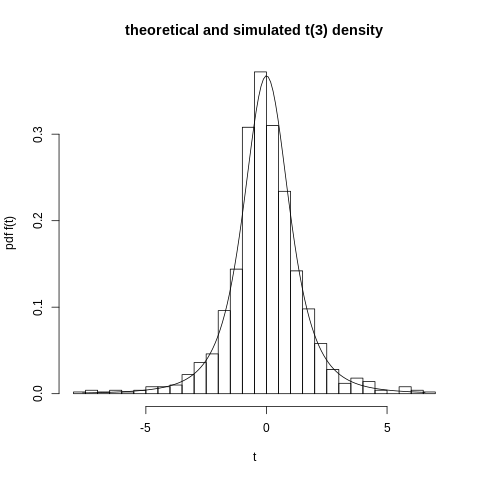

In [0]:
%%R

pt3 <- function(x) {
  # Calculate theoretical pdf of t(3)
    
  2 / (sqrt(3) * pi) * (1 + x^2/3)^(-2)
}

c = 2
rt3 <- function() {
  # Simulate t(3) using acceptance-rejection method
  success <- FALSE
  while (!success) {
    # Cauchy distribution
    uc <- runif(1, min = 0, max = 1)
    y <- sqrt(3) * tan(pi * (uc - 1/2))
      
    # Uniform distribution
    u <- runif(1, min = 0, max = 1)
    
    # Accept/Reject
    if (u <= 1/c * 2 * (1 + y^2/3)^(-1)) {
        return(y)
    }
  }
}

# Compare the sample pdf curve with the actual t(3) curve 
set.seed(1)
n <- 1000
t3.sim <- replicate(n, rt3()) # random t(3) by acceptance-rejection method
hist(t3.sim, breaks=40, freq=F, xlab="t", ylab="pdf f(t)", 
     main="theoretical and simulated t(3) density") # simulated pdf
t <- seq(min(t3.sim), max(t3.sim), .1)
lines(t, pt3(t)) # theoretical pdf

## Problem 3
The Dirichlet distribution is a multivariate generalisation of the beta distribution. It takes values
in {x = (x1, . . . , xd) : xi ∈ [0, 1],
P
i
xi = 1}, and, for α = (α1, . . . , αd) ∈ R
d
+, has density
f(x) = 1
B(α)
Y
d
i=1
x
αi−1
i
, where B(α) =
Q
i Γ(αi)
Γ (P
i αi)
.  




(a) Prove that if X = (X1, . . . , Xd) has a Dirichlet distribution with parameter α (we write
X ∼ Dir(α)), then EXi = αi/
P
i αi
. Hint: R
· · · R
f(x)dx1 · · · dxd = 1.  

Calculate $EX_1$:  
$$
\begin{align}
EX_1 &= \int \dots \int x_1 f(x) dx & (dx = dx_1 \dots dx_d) \\
&= \int \dots \int x_1 \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \prod_{i} x_i^{\alpha_i-1} dx & \left(A = \sum_{i} \alpha_i\right) \\
&= \int \dots \int \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} x_1^{(\alpha_1 + 1) - 1} \prod_{i \neq 1} x_i^{\alpha_i-1} dx \\
&= \int \dots \int \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \prod_{i} x_i^{\alpha'_i-1} dx & (\alpha'_i = \alpha_i \text{ for } i \neq 1; \alpha'_i = \alpha_i + 1 \text{ otherwise}) \\
&= \int \dots \int \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \frac{\prod_{i} \Gamma(\alpha'_i)}{\Gamma(A')} \frac{\Gamma(A')}{\prod_{i} \Gamma(\alpha'_i)} \prod_{i} x_i^{\alpha'_i-1} dx & \left(A' = \sum_{i} \alpha'_i\right) \\
&= \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \frac{\prod_{i} \Gamma(\alpha'_i)}{\Gamma(A')} \int \dots \int \frac{\Gamma(A')}{\prod_{i} \Gamma(\alpha'_i)} \prod_{i} x_i^{\alpha'_i-1} dx \\
&= \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \frac{\prod_{i} \Gamma(\alpha'_i)}{\Gamma(A')} \int \dots \int f'(x) dx & \left(f'(x) \text{ PDF of } \text{Dir}\left(\alpha' = \left(\alpha'_1, \dots, \alpha'_d\right)\right)\right) \\
&= \frac{\Gamma(A)}{\prod_{i} \Gamma(\alpha_i)} \frac{\prod_{i} \Gamma(\alpha'_i)}{\Gamma(A')} & \left(\int \dots \int f'(x) dx = 1\right) \\
&= \frac{\Gamma(A)}{\Gamma(A')} \frac{\prod_{i} \Gamma(\alpha'_i)}{\prod_{i} \Gamma(\alpha_i)} & \left(\Gamma(\alpha'_i) = \Gamma(\alpha_i) \text{ for } i \neq 1\right) \\
&= \frac{\Gamma(A)}{\Gamma(A + 1)} \frac{\Gamma(\alpha'_1)}{\Gamma(\alpha_1)} \\
&= \frac{\Gamma(A)}{\Gamma(A + 1)} \frac{\Gamma(\alpha_1 + 1)}{\Gamma(\alpha_1)} \\
&= \frac{\alpha_1}{A} & \left(\Gamma(z + 1) = z\Gamma(z)\right) \\
\end{align}
$$

Without loss of generality, the steps above can be applied to calculate any $EX_i$:  
$$
\begin{align}
EX_i &= \frac{\alpha_i}{A} = \frac{\alpha_i}{\sum_{i} \alpha_i} \\
\end{align}
$$
as required.  


(b) Show that the Dirichlet distribution is the conjugate prior for the multinomial. That is, if
p ∼ Dir(α) and X|p ∼ multinomial(n, p), then p|{X = x} ∼ Dir(β), where β depends on α
and x.  

PDF of prior Dirichlet is proportional to:  
$$
\begin{align}
\prod_{i} p_i^{\alpha_i-1} \\
\end{align}
$$

PMF of conditional Multinomial is proportional to:  
$$
\begin{align}
\prod_{i} p_i^{x_i} \\
\end{align}
$$

According to Bayes' rule, PDF of posterior is proportional to:  
$$
\begin{align}
\prod_{i} p_i^{\alpha_i-1} \prod_{i} p_i^{x_i} = \prod_{i} p_i^{\alpha_i + x_i -1} \\
\end{align}
$$
which is also proportional to PDF of $\text{Dirichlet}(\alpha+x)$.  
Thus, Dirichlet distribution is the conjugate prior for the multinomial.  


(c) In 2003 Briggs, Ades and Price reported on a trial for the treatment of asthma. Patients
received one of two treatments (seretide or fluticasone), and their status was monitored from
week to week. Possible states were  
STW Successfully treated week  
UTW Unsuccessfully treated week  
HEX Hospital managed exacerbation  
PEX Primary-care managed exacerbation  
TF Treatment failure (treatment ceased and patient removed from the trial)  
For patients on seretide, the number of transitions from one state to another were  
To
STW UTW HEX PEX TF  
From Total  
STW 210 60 0 1 1 272  
UTW 88 641 0 4 13 746  
HEX 0 0 0 0 0 0  
PEX 1 0 0 0 1 2  
TF 0 0 0 0 81 81  
The rows of this table can be considered as observations from independent multinomial random
variables. Using Dir(1,. . . ,1) priors, give Bayesian estimates (posterior means) for  
pij = P( state changes from i to j )  
for i = STW, . . . , PEX and j = STW, . . . , TF.  
What prior would be appropriate for the transitions from state TF?  

Since Dirichlet is conjugate prior to Multinomial, the posterior is also Dirichlet, with parameters:  
> From STW: $\alpha = (211, 61, 1, 2, 2)$  
> From UTW: $\alpha = (89, 642, 1, 5, 14)$  
> From HEX: $\alpha = (1, 1, 1, 1, 1)$  
> From PEX: $\alpha = (2, 1, 1, 1, 2)$  

Hence, posterior means are:  
> From STW: $Ep = [211, 61, 1, 2, 2] / 277$  
> From UTW: $Ep = [89, 642, 1, 5, 14] / 751$  
> From HEX: $Ep = [1, 1, 1, 1, 1] / 5$  
> From PEX: $Ep = [2, 1, 1, 1, 2] / 7$  


In [0]:
%%R

print("Posterior means")
alpha <- matrix(c(211,61,1,2,2,
                  89,642,1,5,14,
                  1,1,1,1,1,
                  2,1,1,1,2), nrow=4, byrow=TRUE)
print(alpha / rowSums(alpha))

[1] "Posterior means"
          [,1]      [,2]        [,3]        [,4]        [,5]
[1,] 0.7617329 0.2202166 0.003610108 0.007220217 0.007220217
[2,] 0.1185087 0.8548602 0.001331558 0.006657790 0.018641811
[3,] 0.2000000 0.2000000 0.200000000 0.200000000 0.200000000
[4,] 0.2857143 0.1428571 0.142857143 0.142857143 0.285714286


For the transitions from state TF, there is no possibilities other than to state TF. Thus, the prior should be such that $p_{\text{TF}-j} = 0 \text{ for } j \neq \text{TF} \text{ and } p_{\text{TF-TF}} = 1$. That is, the prior follows $\text{MVN}(\mu=[0, 0, 0, 0, 1], \Sigma=0)$  


## Problem 4
There is a famous data set from RA Fisher’s 1936 paper on The use of multiple measurements in
taxonomic problems which consists of 50 samples from each of three species of Iris (Iris setosa, Iris
virginica and Iris versicolor). Four features were measured from each sample: the length and the
width of the sepals and petals, in centimetres.  
The data is available in R in the data set iris.  
Perform a principal components and cluster analysis on the four variables using the R commands
prcomp and kmeans. Use two separate methods to determine the number of clusters.  
Use the ggplot2 and ggfortify libraries to do plots of the first two principal components that
indicate where the directions of the original variables and the positions of the cluster means.  
Comment on your results.  


In [0]:
%%R

# Data
print(str(iris))

# Separate measurements and species
measures <- subset(iris, select=-Species)
measures.std <- scale(measures) # standardized
species <- iris[, "Species"]

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


### Principal Component Analysis

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000


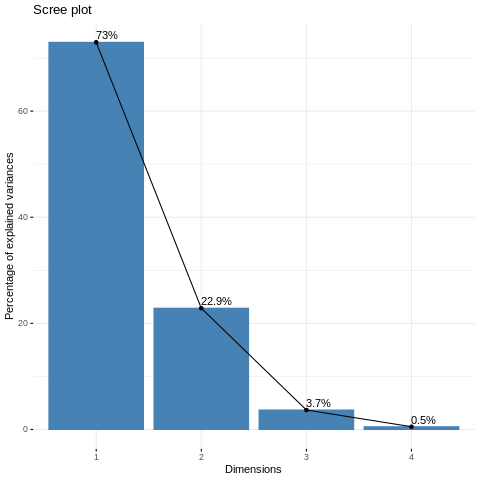

In [0]:
%%R

pca <- prcomp(measures.std, scale=TRUE)

# Importance of components
print(summary(pca))
print(fviz_eig(pca, addlabels=TRUE))

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


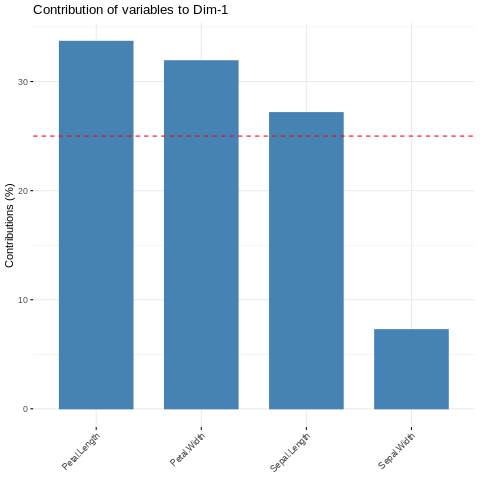

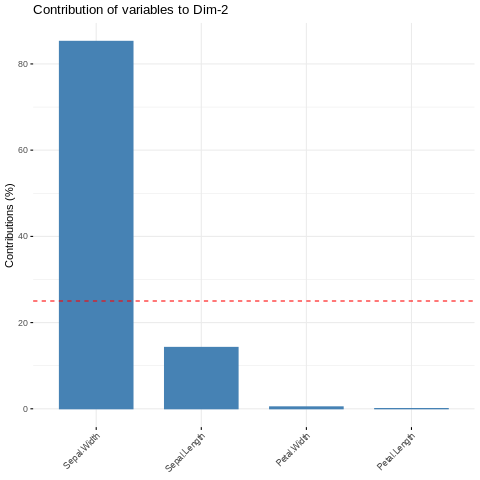

In [0]:
%%R

# Contribution of variables
print(pca)
print(fviz_contrib(pca, choic="var", axes=1, top=10))
print(fviz_contrib(pca, choic="var", axes=2, top=10))

**Comments**:  
From *Cumulative Proportion*, the first 2 principal components sufficiently capture over 95% of variance in data.  
From *rotation*, *Sepal.Width* is the least significant contributing factor to first principal component (PC1), while *Petal.Length* and *Petal.Width* are the least significant contributing factors to second principal component (PC2).  


### K-means


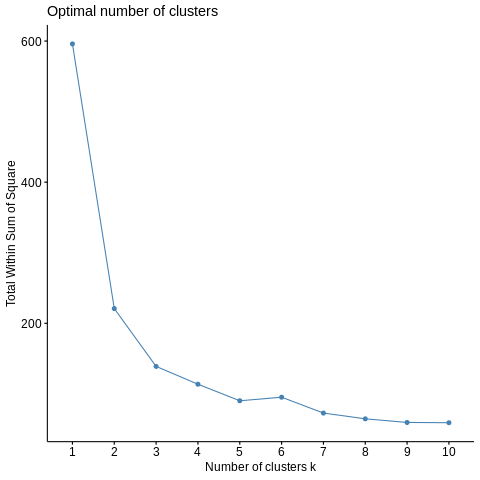

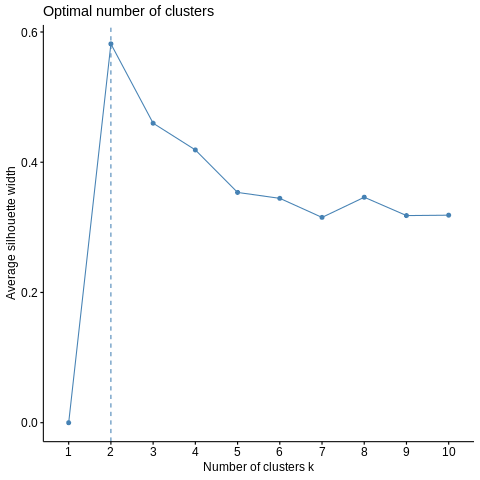

In [0]:
%%R

# Run kmeans over a range of different numbers of clusters
print(fviz_nbclust(measures.std, kmeans, method="wss")) # Within Sum of Squares
print(fviz_nbclust(measures.std, kmeans, method="silhouette"))

**Comments**:  
Both methods (Within Sum of Squares and Silhouette) happen to agree on the same optimal number of clusters $K = 2$ (Within Sum of Squares leveling off and Silhouette topping at same point $K = 2$).  

Let us proceed to cluster the data accordingly.  


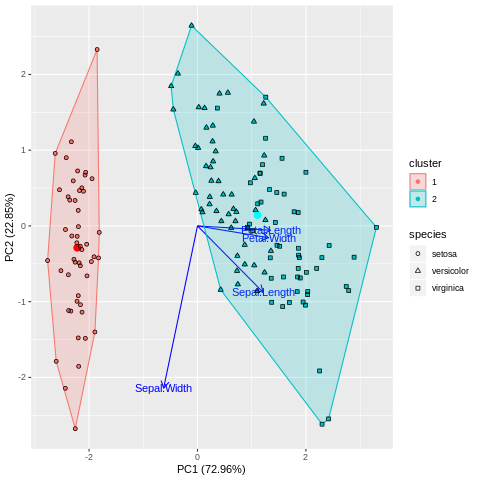

In [0]:
%%R

# Cluster
k <- 2
km <- kmeans(measures.std, k, nstart=10)
centers.pca <- predict(pca, newdata=km$centers)[, c("PC1", "PC2")] # principal components of centers

# Plot
autoplot(km, data=measures.std, scale=FALSE, frame=TRUE, loadings=TRUE, loadings.label=TRUE,
         loadings.colour="blue", loadings.label.colour="blue") + # clusters and directions
geom_point(data=centers.pca, colour=as.numeric(row.names(centers.pca))*2.5, size=3) + # centers
geom_point(aes(shape=species)) + scale_shape(solid=FALSE) # species

From the graph, it can be realized that:  

*   Variable *Sepal.Width* has the most significant influence in PC1-PC2 coordinates.
*   The 2 clusters are well separated.
*   Although there are 3 classes in our dataset, two of them (*versicolor* and *virginica*) are close to each other, thus clustered into the same group.

